# README
---

Following is a brief recap of the columns, and issues we tackled on SQL.  
The there is a brief overview of the contents of this notebook. 

## Recap
---

 ### Columns

<ul>
  <li><b>ride_id:</b> A unique identifier for each ride.</li>
  <li><b>rideable_type:</b> Type of rideable vehicle used for the trip (classic_bike,electric_bike,docked_bike).</li>
  <li><b>started_at:</b> The date and time when the ride started. (datetime data).</li>
  <li><b>ended_at:</b> The date and time when the ride ended. (datetime data).</li>
  <li><b>start_station_name:</b> The name of the station where the ride started.</li>
  <li><b>start_station_id:</b> The unique identifier of the station where the ride started.</li>
  <li><b>end_station_name:</b> The name of the station where the ride ended.</li>
  <li><b>end_station_id:</b> The unique identifier of the station where the ride ended.</li>
  <li><b>start_lat:</b> The latitude coordinate of the starting station.</li>
  <li><b>start_lng:</b> The longitude coordinate of the starting station.</li>
  <li><b>end_lat:</b> The latitude coordinate of the ending station.</li>
  <li><b>end_lng:</b> The longitude coordinate of the ending station.</li>
  <li><b>member_casual:</b> Indicates whether the rider is a member or a casual user of the service. (member,casual).</li>
  <li><b>ride_duration:</b> Ride duration in minutes (keeping two decimal points).</li>
  <li><b>day_of_the_week:</b> Day of the week the bike ride started in Mon,Tue,... Format.</li>
  <li><b>month:</b> Month that the bike ride started in Jan,Feb,... Format.</li>
</ul>


### Data Cleaning & Data integrity

<h4>Cleaning results for columns used:</h4>
<ul>
    <li><b>ride_id:</b> No issues found. Has been set to VARCHAR(16), primary key.</li>
    <li><b>rideable_type:</b> Types of rideable vehicle used for the trip (classic_bike, electric_bike, docked_bike).</li>
    <li><b>started_at, ended_at:</b> Within range. Some end before starting, resulting in negative ride_durations, that have been cleaned and set to NULL.</li>
    <li><b>start_lat, start_lng:</b> No issues found.</li>
    <li><b>end_lat:</b> Had three invalid 0.0 values, have been set to NULL.</li>
    <li><b>end_lng:</b> Had three invalid 0.0 values, have been set to NULL.</li>
    <li><b>member_casual:</b> No issues found.</li>
</ul>

<h4>Cleaning results for columns created:</h4>
<ul>
    <li><b>ride_duration:</b> Duration of ride in min, have set negative durations to NULL, won't tamper with our analysis.</li>
    <li><b>day_of_the_week:</b> No issues.</li>
    <li><b>month:</b> No issues.</li>
</ul>

<h4>Cleaning results for columns not used:</h4>
<ul>
    <li><b>start_station_name, end_station_name:</b> Many typos. Station name can match to more than one id. Has NULL values. Are not a part of our analysis.</li>
    <li><b>start_station_id, end_station_id:</b> Same station id can match to more than one station. Has NULL values. Are not a part of our analysis.</li>
</ul>

<h4>Issues found:</h4>
<ul>
    <li><b>Incomplete:</b>
        <ul>
            <li>Rows are sometimes incomplete, and have missing values for end start information.</li>
        </ul>
    </li>
    <li><b>Reliability issues:</b>
        <ul>
            <li>Some rides seem to end before starting, resulting in negative ride_duration, that have been cleaned and set to NULL.</li>
        </ul>
    </li>
    <li><b>Names of stations have errors, and no actual station info was provided to validate.</b></li>
    <li><b>Station ids are not always unique to the station, and have many different formats</b> (ex. some had 3 numbers some had 5).</li>
    <li><b>end_lat, end_lng had three 0.0 values. Cleaned.</b></li>
</ul>


## Brief Overview
---

<ul>
    <li><a href="#importing-necessary-libraries">1. Importing Necessary Libraries</a></li>
    <li><a href="#data-import-and-preparation">2. Data Import and Preparation</a>
        <ul>
            <li>2.1 Import Data</li>
                <ul>
                <li>Option 1: Importing Data from SQL</a></li>
                <li>Option 2: Importing Data from CSV</a></li>
                </ul>
            <li>2.2 Setting and Checking Column Data Types</a>
                <ul>
                    <li>2.3.1 Assigning Data Types</a></li>
                    <li>2.3.2 Verifying Data Types</a></li>
                </ul>
            </li>
        </ul>
    </li>
    <li><a href="#exploratory-data-analysis">3. Exploratory Data Analysis (EDA)</a>
        <ul>
            <li><a href="#descriptive-statistics">3.1 Descriptive Statistics</a></li>
            <li><a href="#data-visualization">3.2 Data Visualization</a>
                <ul>
                    <li><a href="#about-number-of-rides">3.2.1 About Number of Rides</a>
                        <ul>
                            <li>A. Pie Chart: Number of Rides (Members vs Casual Users)</a></li>
                            <li>B. Weekly Ride Distribution (Members vs Casual Users)</a></li>
                            <li>C. Monthly Ride Distribution (Members vs Casual Users)</a></li>
                        </ul>
                    </li>
                    <li><a href="#about-ride-duration">3.2.2 About Ride Duration</a>
                        <ul>
                            <li>A. Weekly Ride Duration (Members vs Casual Users)</a></li>
                            <li>B. Monthly Ride Duration (Members vs Casual Users)</a></li>
                        </ul>
                    </li>
                    <li><a href="#about-rideable-type">3.2.3 About Rideable Type</a>
                        <ul>
                            <li>A. Pie Chart: Rideable Type Distribution (Electric vs Classic Bikes)</a></li>
                            <li>B. Bar Charts: Rideable Types Distribution (Members vs Casual Users)</a></li>
                        </ul>
                    </li>
                </ul>
            </li>
        </ul>
    </li>    
</ul>

<ul>
<li><a href="#4-results">4. Conclusion</a>
</li>
</li>
<li><a href="#5-suggestions">5. Suggestions</a>
</li>
<ul>



# 1. Importing Necessary Libraries <a id="importing-necessary-libraries"></a>


**pip that need to be installed:**  
pip install jupyter lab  
pip install numpy  
pip install pandas  
pip install sqlalchemy  
pip install psycopg2-binary  
pip install matplotlib
pip install scipy # need for trimmed mean  
pip install statsmodels

In [9]:
import numpy as np
import pandas as pd
import os
from sqlalchemy import create_engine #to import data from sql
import matplotlib.pyplot as plt # graphs
from matplotlib import rc
from scipy.stats import trim_mean # need for trimmed mean

# 2. Data Import and Preparation <a id="data-import-and-preparation"></a>
---

## 2.1 Import
---

<b> Have two possible options for importing for ease of use for the user: </b> <br>
* <u>Import from SQL option</u> - If you have gone through the steps of creating the database.
* <u>Import from CSV option</u> - If you just want to review the python outputs without actually creating the database 

If you want to change the options while running all the code blocks, alter the which of the two options is as markdown or code.  
<b>Note:</b> Importing may take a minute

### Option 1: Importing Data from SQL

<div class="alert alert-block alert-danger"><b>Important:</b> Change connection inputs to your database inputs. <br> Running the following code may take some minutes </div>

In [ ]:
import pandas as pd
from sqlalchemy import create_engine
#--------------change this part ------------------
# Database Information - Inputs
db_name = 'divvy-tripdata'
db_user = 'postgres'
db_password = 'postgres'
db_host = 'localhost'
db_port = '5432'
#-------------------------------------------------
# Create an engine
engine = create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')
# Following is the query we want to import
query = '''SELECT *
FROM bike_data'''
# Create Dataframe:
df_import = pd.read_sql(query, engine)
# Print Dataframe:
print(df_import)
df=df_import.dropna(ignore_index=True)
print(df)
print(f"Out of {df_import.shape[0]} rows, {df.shape[0]} rows are complete with no missing values, amounting to {round(df.shape[0]/df_import.shape[0],2)*100}%")

<div class="alert alert-block alert-info"><b>Note:</b> <br> 
-Dataframe <b>df_import</b> has all rows <u>including missing values</u> while <br>
-Dataframe <b>df</b> has <u>only complete rows</u>, meaning containing no missing values. <br>
The complete records of df are important , as cases missing start and end destinations, and/or having negative durations may negatively impact our analysis.</div>

In [7]:
#create a csv file for imported data from SQL
folder = r'C:\0.Sync\Coding\Data\Projects\CyclisticBike-Share'
file = 'divvy-tripdata_2023.csv'
path=os.path.join(folder, file)
df.to_csv(path, index=False)
print("CSV divvy-tripdata_2023.csv, created")

NameError: name 'df' is not defined

### Option 2: Importing Data from CSV

<div class="alert alert-block alert-danger"><b>Important:</b> Change folder,file to you path and csv file name </div>

In [24]:
#--------------change this part ------------------
folder = r'C:\0.Sync\Coding\Data\Projects\CyclisticBike-Share'
file = 'divvy-tripdata_2023.csv'
#-------------------------------------------------
path=os.path.join(folder, file)
df_import= pd.read_csv(path)
print(df_import)
df=df_import.dropna(ignore_index=True)
print(df)
print(f"Out of {df_import.shape[0]} rows, {df.shape[0]} rows are complete with no missing values, amounting to {round(df.shape[0]/df_import.shape[0],2)*100}%")

                  ride_id  rideable_type           started_at  \
0        C4E20E743EEBE781   classic_bike  2023-08-02 19:05:40   
1        AB17A09B37BAD39A  electric_bike  2023-08-18 22:53:20   
2        0B17D56196D063EA  electric_bike  2023-08-19 07:56:18   
3        2A13287E5EC2CF69  electric_bike  2023-08-01 18:28:08   
4        1B7F1EB9737E7BBF  electric_bike  2023-08-01 17:24:05   
...                   ...            ...                  ...   
5719872  D0999A931724CACE  electric_bike  2023-04-15 13:11:52   
5719873  EFE86CD88CB1E5A2  electric_bike  2023-04-30 09:22:31   
5719874  438A83BF9F60BF50  electric_bike  2023-04-26 19:52:11   
5719875  C0317955023D29A7   classic_bike  2023-04-21 08:55:04   
5719876  C683EBE98B35F092  electric_bike  2023-08-21 18:48:13   

                    ended_at                  start_station_name  \
0        2023-08-02 19:46:57                      Dusable Harbor   
1        2023-08-18 23:03:28              Clark St & Lincoln Ave   
2        2023-0

## 2.2 Setting and Checking Column Data Types
---

### 2.2.1 Assigning Data Types

It's important to assign data types for our dataframe before going forward with the EDA.  
We are going to do that with the following code:

In [19]:
# Explicitly copy the DataFrame to avoid any SettingWithCopyWarning issues if I don't use copy
df = df.copy()

# Assign as string using .astype(str)
df['ride_id'] = df['ride_id'].astype(str)

# Assign as categorical without order using .astype('category')
df['rideable_type'] = df['rideable_type'].astype('category')
df['member_casual'] = df['member_casual'].astype('category')

# Assign as categorical with order using pd.Categorical
day_of_the_week_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['day_of_the_week'] = pd.Categorical(df['day_of_the_week'], categories=day_of_the_week_order, ordered=True)

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

# Assign as datetime using pd.to_datetime
df['started_at'] = pd.to_datetime(df['started_at'])  
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Assign as float using .astype('float64')
df['start_lat'] = df['start_lat'].astype('float64')
df['start_lng'] = df['start_lng'].astype('float64')
df['end_lat'] = df['end_lat'].astype('float64')
df['end_lng'] = df['end_lng'].astype('float64')
df['ride_duration'] = df['ride_duration'].astype('float64')

print('Data types have been assigned')

Data types have been assigned


### 2.2.2 Verifying Data Types

In [6]:
# print datatypes
print("The datatypes have been assigned as:")
print(df.dtypes)
print("------------------------------")

# check if ride_id has unique values
if_unique_ride_id=df['ride_id'].nunique()==df.shape[0]
print(f"All ride_id's are unique={if_unique_ride_id}")
print("------------------------------")

# explore categorical data types:
print("By checking all categorical values we have:\n")
columns_check=['rideable_type','member_casual','day_of_the_week','month']
for i in columns_check:
    print(f"{i} has {df[i].unique()} values\n and unique values {df[i].nunique()}\n")


The datatypes have been assigned as:
ride_id                       object
rideable_type               category
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual               category
ride_duration                float64
day_of_the_week             category
month                       category
dtype: object
------------------------------
All ride_id's are unique=True
------------------------------
By checking all categorical values we have:

rideable_type has ['classic_bike', 'electric_bike', 'docked_bike']
Categories (3, object): ['classic_bike', 'docked_bike', 'electric_bike'] values
 and unique values 3

member_casual has ['casual', 'member']
Categories (

<div class="alert alert-block alert-info"><b>Looking at the results:</b><br> 
-Datatypes have been altered correctly.<br>
-Categorical values have been confirmed, and order of days and months are correct.<br>
</div>

# 3. Exploratory Data Analysis (EDA)<a id="exploratory-data-analysis"></a>
---

## 3.1 Descriptive Statistics <a id="descriptive-statistics"></a>
---

## Some reports

### Missing Values

A quick review of all missing values. Have not been included in our analysis.

In [23]:
#All Missing values from imported data - not df- df has no missing values
missing_values_df_import = df_import.isnull().sum()
print("----Missing values----")
print(missing_values_df_import)

----Missing values----
ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    875716
start_station_id      875848
end_station_name      929202
end_station_id        929343
start_lat                  0
start_lng                  0
end_lat                 6993
end_lng                 6993
member_casual              0
ride_duration            272
day_of_the_week            0
month                      0
dtype: int64


### Summary Statistics by type:

In [7]:
# column list based on dtype
category_columns = df.select_dtypes(include=['category']).columns.tolist()
datetime_columns = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()
float_columns = df.select_dtypes(include=['float64']).columns.tolist()
object_columns = df.select_dtypes(include=['object']).columns.tolist()


#1. Categorical Data
categorical_summary = df[category_columns].describe()
#2. Datetime Data
datetime_summary=df[datetime_columns].describe()
#3. Numeric Data
float_summary=df[float_columns].describe().map(lambda x: f'{x:,.2f}')
#4. object -> ride_id (all are unique)
object_summary=df[object_columns].describe()

#all printouts
print("----------------Summary:Categorical Data----------------")
print(categorical_summary)
print("----------------Categorical value counts----------------")
for col in category_columns:
    print(f"\n{col}")
    print(df[col].value_counts().sort_index())
print("----------------Summary:Datetime Data----------------")
print(datetime_summary)
print("----------------Summary:Numeric Data----------------")
print(float_summary)
print("----------------Summary:ride_id----------------")
print(object_summary)


----------------Summary:Categorical Data----------------
       rideable_type member_casual day_of_the_week    month
count        4331638       4331638         4331638  4331638
unique             3             2               7       12
top     classic_bike        member             Sat      Aug
freq         2690705       2799919          660802   584911
----------------Categorical value counts----------------

rideable_type
rideable_type
classic_bike     2690705
docked_bike        76124
electric_bike    1564809
Name: count, dtype: int64

member_casual
member_casual
casual    1531719
member    2799919
Name: count, dtype: int64

day_of_the_week
day_of_the_week
Mon    562094
Tue    630384
Wed    635808
Thu    651581
Fri    628372
Sat    660802
Sun    562597
Name: count, dtype: int64

month
month
Jan    148284
Feb    149560
Mar    200447
Apr    324194
May    463222
Jun    534753
Jul    573955
Aug    584911
Sep    506632
Oct    403775
Nov    274766
Dec    167139
Name: count, dtype: int64
-

### Members vs casual users ride durations and general comparisons

Mean ride Duration

In [8]:
mean_duration=round(df['ride_duration'].mean(),2)
mean_duration_members=round(df['ride_duration'][df['member_casual']=='member'].mean(),2)
mean_duration_casuals=round(df['ride_duration'][df['member_casual']=='casual'].mean(),2)
print(f"The mean ride duration is {mean_duration} minutes. For members average duration is {mean_duration_members} while for casual users it is {mean_duration_casuals}.")

The mean ride duration is 15.95 minutes. For members average duration is 12.13 while for casual users it is 22.94.


<div class="alert alert-block alert-info">We can see that <b>casual users have longer average ride durations than members</b>. We will discuss this further later on our analysis.
</div>

Median ride duration

In [9]:
median_duration=df['ride_duration'].median()
median_duration_members=df['ride_duration'][df['member_casual']=='member'].median()
median_duration_casuals=df['ride_duration'][df['member_casual']=='casual'].median()
print(f"The median ride duration is {median_duration} minutes. For members median duration is {median_duration_members} while for casuals {median_duration_casuals}.")

The median ride duration is 9.8 minutes. For members median duration is 8.62 while for casuals 12.75.


<div class="alert alert-block alert-info">We can see that <b>casual users have longer median ride durations than members</b>. We will discuss this further later on our analysis
</div>

In [10]:
proportion_to_cut = 0.05

# Calculate overall trimmed means
trimmed_mean_duration = trim_mean(df['ride_duration'], proportion_to_cut)
trimmed_mean_members = trim_mean(df['ride_duration'][df['member_casual']=='member'], proportion_to_cut)
trimmed_mean_casuals = trim_mean(df['ride_duration'][df['member_casual']=='casual'], proportion_to_cut)

print(f"The median ride duration is {trimmed_mean_duration} minutes. For members median duration is {trimmed_mean_members} while for casuals {trimmed_mean_casuals}.")

The median ride duration is 12.440623607789297 minutes. For members median duration is 10.439182020604546 while for casuals 17.273224288726773.


Members vs Casual Users Comparison Statistics

In [11]:
# Segment the data by member or casual
members = df[df['member_casual'] == 'member']
casuals = df[df['member_casual'] == 'casual']

# Descriptive statistics for numerical columns
numerical_columns = ['ride_duration']
describe_members = members[numerical_columns].describe()
describe_casuals = casuals[numerical_columns].describe()

# For ride durations
print("***************Numeric***************\n-----ride_duration-----")
print("\nmembers:")
print(round(describe_members,2))
print("\ncasual users:")
print(round(describe_casuals,2))

# Descriptive statistics for categorical columns
categorical_columns = ['rideable_type', 'day_of_the_week', 'month']
print("\n***************Category***************\nFrequency distributions members vs casual users:\n")
for col in categorical_columns:
    print(f"\n----------Frequency distributions for {col}----------")

    #Frequency distribution for members
    member_counts = round(members[col].value_counts(normalize=True), 2) # returns the percentages of the value counts for members by using normalize=True, rounded in 2 digits
    print(f"Frequencies {col} (members):")
    print(member_counts.sort_index()) # sort_index to display in the correct order of day and month
    
    #Frequency distribution for casual users
    casual_counts = round(casuals[col].value_counts(normalize=True), 2) # returns the percentages of the value counts for casual users by using normalize=True, rounded in 2 digits
    print(f"Frequencies {col} (casual users):")
    print(casual_counts.sort_index()) # sort_index to display in the correct order of day and month

***************Numeric***************
-----ride_duration-----

members:
       ride_duration
count     2799919.00
mean           12.13
std            22.01
min             0.00
25%             5.03
50%             8.62
75%            14.70
max          1497.87

casual users:
       ride_duration
count     1531719.00
mean           22.94
std            52.17
min             0.00
25%             7.18
50%            12.75
75%            24.07
max         12136.30

***************Category***************
Frequency distributions members vs casual users:


----------Frequency distributions for rideable_type----------
Frequencies rideable_type (members):
rideable_type
classic_bike     0.65
docked_bike      0.00
electric_bike    0.35
Name: proportion, dtype: float64
Frequencies rideable_type (casual users):
rideable_type
classic_bike     0.57
docked_bike      0.05
electric_bike    0.38
Name: proportion, dtype: float64

----------Frequency distributions for day_of_the_week----------
Frequencies 

<div class="alert alert-block alert-info"><u>By comparing the members and casual users data we can see some interesting results:</u><br>
1. <b>The distributions by day of the week is very different</b> for members and casual users. <br>
2. <b>The distributions by month seem to exhibit similar patterns, peaks, lows,</b> for members and casual users. The distribution for members is flatter.<br>
3. As we have seen before, <b>mean ride durations and median ride durations are longer for casual users.</b><br>
<u>We will explore those results on the next chapter - Data Visualization.</u>
</div>

## 3.2 Data Visualization <a id="data-visualization"></a>
---

#4095A5 #cyclistic_blue  
#F2FC67 #cylcistic_yellow #F2FC67 #golden

**Run the following block**. Defines if the plots should be saved locally or not within the code blocks for plots.

In [70]:
# Image - Plot save
# If you run the code with image_save=False, it doesn't save the images. If set to True then saves them on the directory of the running .ipynb file
image_save=True

### 3.2.1 About Number of Rides <a id="about-number-of-rides"></a>
---

#### A. Pie Chart: Rides Distribution (Members vs Casual Users)

Compare the percentage of rides taken by members and casual riders.

C:\Users\Jim\AppData\Local\Temp\ipykernel_2076\2160493072.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_member_casual_size = df.groupby('member_casual', dropna=False).size()


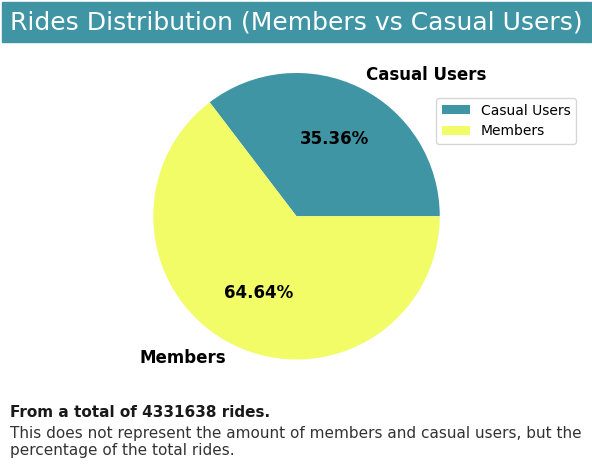

In [65]:
# Set inputs for the plot
## Retrieve the frequencies:
grouped_member_casual_size = df.groupby('member_casual', dropna=False).size()

## Calculate percentages from the frequencies:
df_pie_members_casuals = round(grouped_member_casual_size / grouped_member_casual_size.sum()* 100, 2) 

## Change index for a better graph display
df_pie_members_casuals.index = ['Members' if x == 'member' else 'Casual Users' for x in df_pie_members_casuals.index]

# Presets for plot:
color = ['#4095A5', '#F2FC67']

# Plot
plt.pie(df_pie_members_casuals,
        colors=color,
        labels=df_pie_members_casuals.index,
        autopct='%1.2f%%',
        textprops={'weight': 'bold', 'size': 'large'})  # adjust textprops


## Display: plot
plt.title("Rides Distribution (Members vs Casual Users)",
          color='white',backgroundcolor='#4095A5',fontsize=18, ha='center')
plt.legend(df_pie_members_casuals.index,
           loc='upper right',bbox_to_anchor=(1.3, 0.85))

## Set Text:
plt.text(-2, -1.4, f"From a total of {df['member_casual'].shape[0]} rides.",
         alpha=0.9,fontsize=11,ha='left', wrap=True,weight='bold')
plt.text(-2, -1.65, f"This does not represent the amount of members and casual users, but the percentage of the total rides.",
         alpha=0.8,fontsize=11,ha='left', wrap=True)

plt.tight_layout()

# Save image if set to True
if image_save==True:
    plt.savefig('3.2.1.A. Pie Chart Rides Distribution (Members vs Casual Users).png', dpi=300,bbox_inches='tight')

plt.show()


<b>Main Takeaways</b><br>
<b>Graph:</b> The pie chart illustrates <u>the distribution of rides between members and casual users</u>, indicating the proportion of total rides attributed to each user group.
<ul>
  <li><b>Members:</b>
    <ul>
      <li><b>Majority Share:</b> <u>Members account for the majority of rides</u>. This suggests a strong and consistent user base within the membership program, likely comprising regular commuters or frequent users of bike services.</li>
    </ul>
  </li>
  
  <li><b>Casual Users:</b>
    <ul>
      <li><b>Substantial Share:</b> <u>Casual users contribute a significant portion of rides</u>. This highlights the importance of catering to casual users and accommodating their needs within the bike-sharing system.</li>
    </ul>
  </li>
</ul>


#### B. Weekly Ride Distribution (Members vs Casual Users)

Compare the percentage of rides taken by members and casual riders across different days of the week.

C:\Users\Jim\AppData\Local\Temp\ipykernel_2076\120970695.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_day_of_the_week = df.groupby(['member_casual','day_of_the_week']).size()


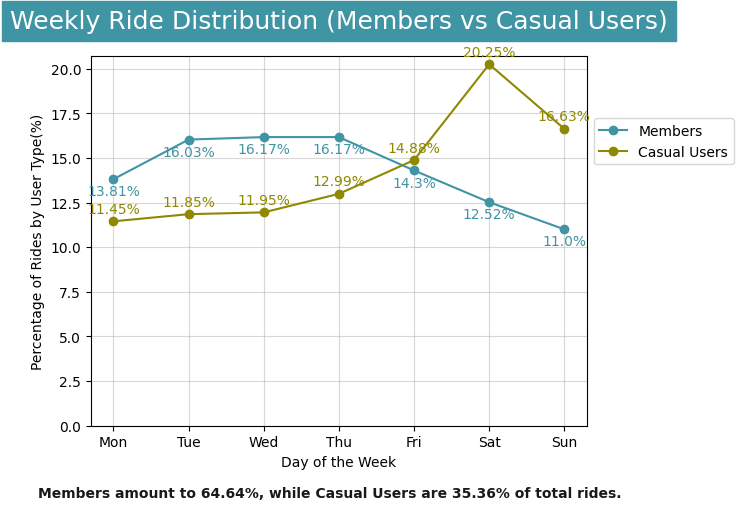

In [55]:
# Set inputs for the plot
## Group the DataFrame by 'day_of_the_week' and calculate the size
grouped_day_of_the_week = df.groupby(['member_casual','day_of_the_week']).size()

## Line plot 1: Members
### Counts by day for members:
member_counts = grouped_day_of_the_week.loc['member']
### Calculate percentages based on counts for members:
member_percentages = round(member_counts / member_counts.sum()*100, 2) 

## Line plot 2: Casual Users
### Counts by day for casual users:
casual_counts = grouped_day_of_the_week.loc['casual']
### Calculate percentages based on counts for casual users:
casual_percentages = round(casual_counts / casual_counts.sum()* 100, 2) 

# Preset for plot:
color = ['#4095A5', '#8F8800']
#plt.figure(figsize=(10, 6))  # Set the figure size

# Plot:
plt.plot(grouped_day_of_the_week.loc['member'].index, member_percentages.values, 
         color=color[0],marker='o',label='Members')
plt.plot(grouped_day_of_the_week.loc['casual'].index, casual_percentages.values,
         color=color[1],marker='o',label='Casual Users')

## Annotate values of the graph
for x, y in zip(grouped_day_of_the_week.loc['member'].index, member_percentages.values):
    plt.text(x, y-0.3, f'{y}%', ha='center', va='top', fontsize=10, color=color[0], rotation=0)

for x, y in zip(grouped_day_of_the_week.loc['casual'].index, casual_percentages.values):
    plt.text(x, y+0.3, f'{y}%', ha='center', va='bottom', fontsize=10, color=color[1], rotation=0)


## Display: plot
plt.title("Weekly Ride Distribution (Members vs Casual Users)",
          color='white',backgroundcolor='#4095A5',fontsize=18, ha='center',pad=20)
plt.xlabel('Day of the Week')
plt.ylabel('Percentage of Rides by User Type(%)')
plt.ylim(bottom=0)
plt.grid(True,alpha=0.5)
plt.legend(loc='best',bbox_to_anchor=(1, 0.85))

## Set Text:

plt.text(-1, -4, f"Members amount to {round(member_counts.sum()/grouped_day_of_the_week.sum()*100,2)}%, while Casual Users are {round(casual_counts.sum()/grouped_day_of_the_week.sum()*100,2)}% of total rides.",
          alpha=0.9,fontsize=10,ha='left', wrap=True,weight='bold')
#plt.tight_layout()

# Save image if set to True
if image_save==True:
    plt.savefig('3.2.1.B. Weekly Ride Distribution (Members vs Casual Users).png', dpi=300,bbox_inches='tight')

plt.show()


<b>Main Takeaways</b>
<ul>
  <li><b>Day-of-the-Week Distribution:</b> Both members and casual users exhibit distinct patterns in ride distribution across different days of the week, <u>reflecting potential variations in usage behavior or preferences.</u></li>
</ul>
<ul>
  <li><b>Members:</b>
    <ul>
      <li><b>Midweek Peak:</b> <u>Members show peak ride percentages in the middle of the week.</u> This suggests that members may utilize bike services more frequently for commuting purposes or midweek activities.</li>
      <li><b>Weekend Decline:</b> <u>Ride percentages for members decrease towards the weekend.</u> This decline may indicate reduced usage for leisure or recreational purposes during weekends among members.</li>
    </ul>
  </li>
  
  <li><b>Casual Users:</b>
    <ul>
      <li><b>Weekend Peak:</b> Casual users demonstrate a <u>significant increase in ride percentages during the weekend</u>. This surge suggests that casual users may prefer bike services for leisure or weekend activities, contributing to higher usage during weekends.</li>
      <li><b>Weekday Decline:</b> Ride percentages for casual users are lower across weekdays, while increasing closer to the weekend. This indicates potential differences in usage behavior or preferences among casual users during weekdays.</li>
    </ul>
  </li>
</ul>
<b>Members demonstrate different behaviors from casual users</b>, <u>as members ride more during weekdays, while casual users use them more on weekends</u>.   



#### C. Monthly Ride Distribution (Members vs Casual Users)

Compare the percentage of rides taken by members and casual riders across different months.

C:\Users\Jim\AppData\Local\Temp\ipykernel_2076\2083215491.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_month = df.groupby(['member_casual','month']).size()


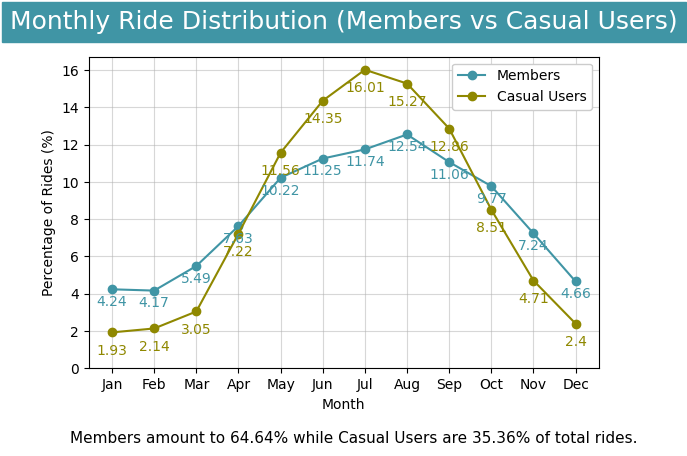

In [63]:
# Set inputs for the plot
## Group the DataFrame by 'month' and calculate the size
grouped_month = df.groupby(['member_casual','month']).size()

## Line plot 1: Members
member_counts = grouped_month.loc['member']
## Calculate percentages for members:
member_percentages = round(member_counts / member_counts.sum()*100, 2) 

## Line plot 2: Casual users
casual_counts = grouped_month.loc['casual']
## Calculate percentages for casual users:
casual_percentages = round(casual_counts / casual_counts.sum()* 100, 2) 

# Preset for plot:
color = ['#4095A5', '#8F8800']
#plt.figure(figsize=(8, 5))  # Set the figure size

# Plot:
plt.plot(grouped_month.loc['member'].index, member_percentages.values, 
         color=color[0],marker='o',label='Members')
plt.plot(grouped_month.loc['casual'].index, casual_percentages.values,
         color=color[1],marker='o',label='Casual Users')


## Annotate values on the graph
for x, y in zip(grouped_month.loc['member'].index, member_percentages.values):
    plt.text(x, y-0.3, f'{y}', ha='center', va='top', fontsize=10, color=color[0], rotation=0)

for x, y in zip(grouped_month.loc['casual'].index, casual_percentages.values):
    plt.text(x, y-0.6, f'{y}', ha='center', va='top', fontsize=10, color=color[1], rotation=0)


## Display: plot
plt.title("Monthly Ride Distribution (Members vs Casual Users)",
          color='white',backgroundcolor='#4095A5',fontsize=18, ha='center',pad=20)
plt.xlabel('Month')
plt.ylabel('Percentage of Rides (%)')
plt.ylim(bottom=0)
plt.grid(True,alpha=0.5)
plt.legend(loc='best',bbox_to_anchor=(1, 1),framealpha=1)
plt.text(-1, -4, f"Members amount to {round(member_counts.sum()/grouped_day_of_the_week.sum()*100,2)}% while Casual Users are {round(casual_counts.sum()/grouped_day_of_the_week.sum()*100,2)}% of total rides.",
         alpha=1,fontsize=11,ha='left', wrap=True)
plt.tight_layout()


# Save image if set to True
if image_save==True:
    plt.savefig('3.2.1.C. Monthly Ride Distribution (Members vs Casual Users).png', dpi=300,bbox_inches='tight')

plt.show()

<b>Main Takeaways</b>
<ul>
  <li><b>Monthly Ride Distribution:</b> The data reveals varying distributions of rides among members and casual users throughout the year, reflecting potential <u>seasonal trends or changes in user behavior</u>.</li>
</ul>
<ul>
  <li><b>Members:</b>
    <ul>
      <li><b>Gradual Increase:</b> Rides by members gradually increase from January to August. This upward trend suggests a growing usage of bike services by members during the warmer months, possibly for commuting or outdoor activities.</li>
      <li><b>Seasonal Fluctuations:</b> Ride percentages among members fluctuate throughout the year, with <u>higher percentages observed during the spring and summer months and lower percentages during the fall and winter months</u>. These fluctuations may be influenced by factors such as weather conditions and holidays.</li>
    </ul>
  </li>
  <li><b>Casual Users:</b>
    <ul>
      <li><b>Significant Variation:</b> Ride percentages among <u>casual users exhibit greater variations compared to members</u>.</li>
      <li><b>Peak Season Summer:</b> <u>The summer months (June, July, and August) see the highest percentages of rides among casual users</u>, indicating a surge in usage during vacation seasons or warmer weather.</li>
    </ul>
  </li>
</ul>

<b>Ride Distribution Exhibits Seasonal Trends:</b> Ride counts reach an <u>all-time low during winter, while peaking during the summer months.</u><br>
<b>The distribution of rides among members has lower variance compared to casual users</b>, indicating a more consistent usage pattern among members. This suggests that members may use the bike services more regularly, likely for commuting or habitual activities, while casual users may be more influenced by external factors such as weather and holidays.

### 3.2.2 About Ride Duration <a id="about-ride-duration"></a>
---

We are gonna <u>explore several central tendency measures</u>, as we are concerned for:
<ul>
<li> There are durations are from 0 sec up to 1 minute</li>
<li> There are durations that last weeks or more </li>
</ul>
We will conduct a detailed analysis of ride durations to account for outliers. This involves plotting the <u>mean, median, and trimmed mean ride durations</u> to provide a comprehensive view of the central tendency of ride durations.
<ul>
<li><b>Mean Ride Durations:</b> By plotting the mean, we capture the overall average ride duration, which helps in understanding the general trend. However, this measure might be skewed by extreme values.</li>
<li><b>Median Ride Durations:</b> Plotting the median ride durations provides a robust central tendency measure that is not influenced by outliers, offering a clearer picture of the typical ride duration.</li>
<li><b>Trimmed Mean Ride Durations:</b> The trimmed mean, which excludes the smallest and largest ride durations, offers a balanced measure by mitigating the impact of outliers while retaining a significant portion of the data for analysis.</li>
</ul>
<br>
<b> Process: we will explore the measures by first looking into the mean, then plot the median and the trimmed mean and compare.</b>
This multi-faceted approach ensures a thorough understanding of the ride duration patterns, accounting for various statistical perspectives and providing a more nuanced analysis of the data.

#### A. Weekly Ride Duration (Members vs Casual Users)

##### Weekly Mean Ride Duration (Members vs Casual Users)

Comparing the mean ride duration trends between members and casual riders across different days of the week.

C:\Users\Jim\AppData\Local\Temp\ipykernel_2076\2320917579.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_day_of_the_week_duration = df_filtered.groupby(['member_casual', 'day_of_the_week'])['ride_duration'].mean()


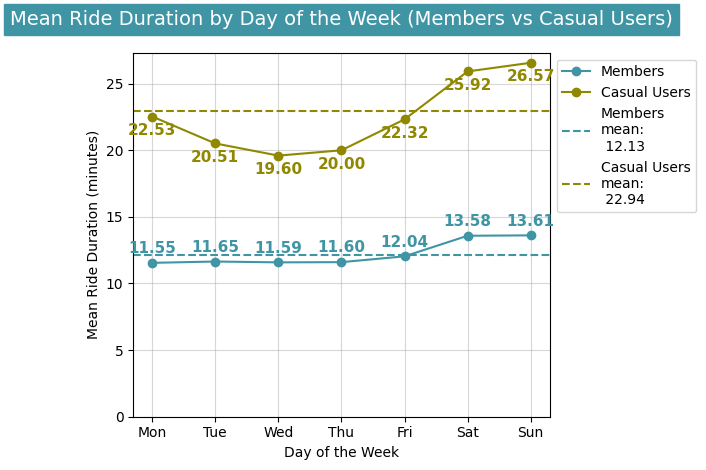

In [34]:
# Set inputs for the plot
## Filter out rows where ride_duration is not NA
df_filtered = df.dropna(subset=['ride_duration'])

## Overall Mean for members and casuals:
mean_members=df_filtered['ride_duration'][df_filtered['member_casual']=='member'].mean()
mean_casuals=df_filtered['ride_duration'][df_filtered['member_casual']=='casual'].mean()

## Group the DataFrame by 'day_of_the_week' and 'member_casual', and calculate the average ride duration
grouped_day_of_the_week_duration = df_filtered.groupby(['member_casual', 'day_of_the_week'])['ride_duration'].mean()

## Durations for members
member_durations = grouped_day_of_the_week_duration.loc['member']
## Durations for casual users
casual_durations = grouped_day_of_the_week_duration.loc['casual']

# Presets for plot:
color = ['#4095A5', '#8F8800']
#plt.figure(figsize=(10, 6))  # Set the figure size

# Plot:
plt.plot(member_durations.index, member_durations.values, 
         color=color[0], marker='o', label='Members')
plt.plot(casual_durations.index, casual_durations.values,
         color=color[1], marker='o', label='Casual Users')

# Plot overall means lines
plt.axhline(y=mean_members, color=color[0], linestyle='--', label=f'Members\nmean:\n {mean_members:.2f}')
plt.axhline(y=mean_casuals, color=color[1], linestyle='--', label=f'Casual Users\nmean:\n {mean_casuals:.2f}')

# Annotate values on the graph
for x, y in zip(member_durations.index, member_durations.values):
    plt.text(x, y+0.5, f'{y:.2f}', ha='center', va='bottom', fontsize=11,weight='bold', color=color[0], rotation=0)

for x, y in zip(casual_durations.index, casual_durations.values):
    plt.text(x, y-0.5, f'{y:.2f}', ha='center', va='top', fontsize=11,weight='bold', color=color[1], rotation=0)

# Display: plot
plt.title("Mean Ride Duration by Day of the Week (Members vs Casual Users)",
          color='white', backgroundcolor='#4095A5', fontsize=14, ha='center',pad=20)
plt.xlabel('Day of the Week')
plt.ylabel('Mean Ride Duration (minutes)')
plt.ylim(bottom=0)
plt.grid(True, alpha=0.5)
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Save image if set to True
if image_save:
    plt.savefig('3.2.2.A. Weekly Mean Ride Duration (Members vs Casual Users).png', dpi=300,bbox_inches='tight')

plt.show()


<b>Main Takeaways</b>
<ul>
  <li><b>Day-of-the-Week Patterns:</b> Both members and casual users show distinct patterns in ride durations across different days of the week, <u>indicating potential differences in usage behavior.</u></li>
</ul>
<ul>
  <li><b>Members:</b>
    <ul>
      <li><b>Consistent Patterns:</b> Members demonstrate relatively <u>consistent ride durations from Monday to Friday</u>, suggesting regular commuting habits or usage patterns during weekdays (may be commuting to work). </li>
      <li><b>Weekend Variations:</b> <u>Ride durations for members increase notably during the weekend</u>, indicating a preference for longer rides during leisure time or weekend outings.</li>
    </ul>
  </li>
  
  <li><b>Casual Users:</b>
    <ul>
      <li><b>Varying Patterns:</b> <u>Casual users exhibit more variability</u> in ride durations across different days of the week compared to members.</li>
      <li><b>Weekend Surges:</b> <u>Ride durations for casual users increase significantly during the weekend</u>, indicating a preference for longer rides during leisure time or weekend outings.</li>
    </ul>
  </li>
</ul>
<b><u>Casual users show significantly higher ride durations compared to members.</u></b>

##### Weekly Median Ride Duration (Members vs Casual Users)

Comparing the median ride duration trends between members and casual riders across different days of the week.


C:\Users\Jim\AppData\Local\Temp\ipykernel_2076\3540204189.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_day_of_the_week_duration = df_filtered.groupby(['member_casual', 'day_of_the_week'])['ride_duration'].median()


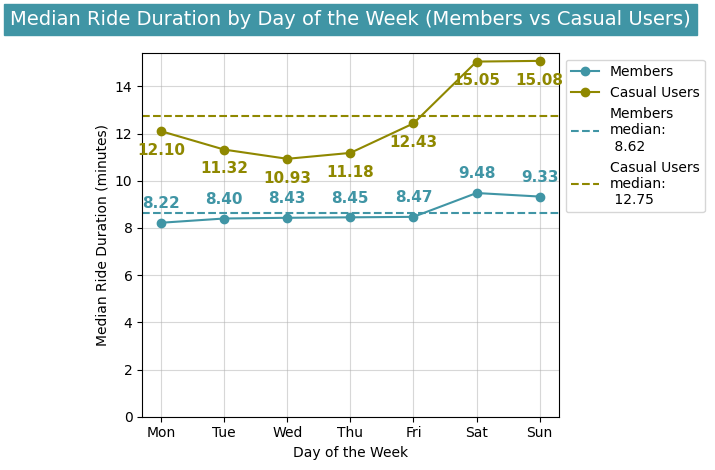

In [30]:
# Set inputs for the plot
## Filter NA values: not really needed as no NA values, but will keep this in case we want to analyse data before dropping all NA
df_filtered = df.dropna(subset=['ride_duration'])

## Median for members
median_members=df_filtered['ride_duration'][df_filtered['member_casual']=='member'].median()
median_casuals=df_filtered['ride_duration'][df_filtered['member_casual']=='casual'].median()

## Group the DataFrame by 'day_of_the_week','member_casual', and calculate the median ride duration
grouped_day_of_the_week_duration = df_filtered.groupby(['member_casual', 'day_of_the_week'])['ride_duration'].median()

## Durations for members
member_durations = grouped_day_of_the_week_duration.loc['member']
## Durations for casual
casual_durations = grouped_day_of_the_week_duration.loc['casual']

# Preset for plot:
color = ['#4095A5', '#8F8800']
#plt.figure(figsize=(10, 6))  # Set the figure size

# Plot:
plt.plot(member_durations.index, member_durations.values, 
         color=color[0], marker='o', label='Members')
plt.plot(casual_durations.index, casual_durations.values,
         color=color[1], marker='o', label='Casual Users')

# Plot overall medians for lines
plt.axhline(y=median_members, color=color[0], linestyle='--', label=f'Members\nmedian:\n {median_members:.2f}')
plt.axhline(y=median_casuals, color=color[1], linestyle='--', label=f'Casual Users\nmedian:\n {median_casuals:.2f}')

# Annotate values on the graph
for x, y in zip(member_durations.index, member_durations.values):
    plt.text(x, y+0.5, f'{y:.2f}', ha='center', va='bottom', fontsize=11,weight='bold', color=color[0], rotation=0)

for x, y in zip(casual_durations.index, casual_durations.values):
    plt.text(x, y-0.5, f'{y:.2f}', ha='center', va='top', fontsize=11,weight='bold', color=color[1], rotation=0)

# Display: plot
plt.title("Median Ride Duration by Day of the Week (Members vs Casual Users)",
          color='white', backgroundcolor='#4095A5', fontsize=14, ha='center',pad=20)
plt.xlabel('Day of the Week')
plt.ylabel('Median Ride Duration (minutes)')
plt.ylim(bottom=0)
plt.grid(True, alpha=0.5)
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Save image if set to True
if image_save:
    plt.savefig('3.2.2.A. Weekly Median Ride Duration (Members vs Casual Users).png', dpi=300,bbox_inches='tight')

plt.show()


##### Weekly Trimmed Mean Ride Duration (Members vs Casual Users)

Comparing the trimmed mean ride duration trends between members and casual riders across different days of the week.


C:\Users\Jim\AppData\Local\Temp\ipykernel_2076\2186021328.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_trimmed_mean = df_filtered.groupby(['member_casual', 'day_of_the_week'])['ride_duration'].apply(lambda x: trim_mean(x, proportion_to_cut))


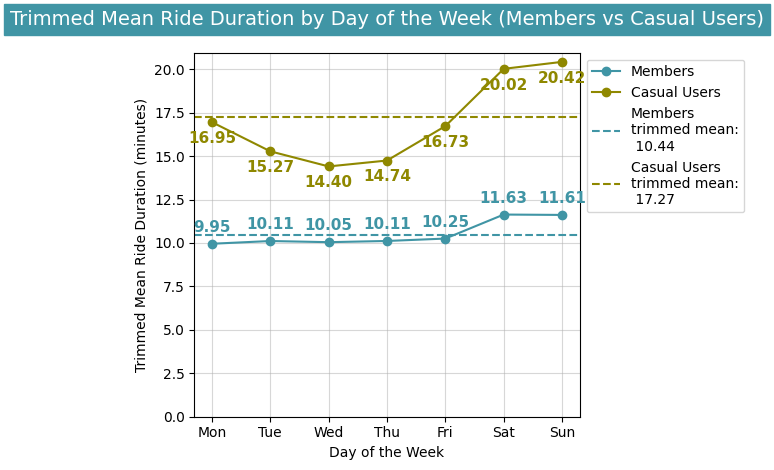

In [62]:
# Set inputs for the plot
## Filter out rows where ride_duration is not NA
df_filtered = df.dropna(subset=['ride_duration'])

# Define the proportion to cut for trimmed mean
proportion_to_cut = 0.05

# Calculate overall trimmed means
trimmed_mean_members = trim_mean(df_filtered[df_filtered['member_casual'] == 'member']['ride_duration'], proportion_to_cut)
trimmed_mean_casuals = trim_mean(df_filtered[df_filtered['member_casual'] == 'casual']['ride_duration'], proportion_to_cut)

# Preset for plot:
# Group the DataFrame by 'day_of_the_week' and 'member_casual', then calculate the trimmed mean ride duration 
grouped_trimmed_mean = df_filtered.groupby(['member_casual', 'day_of_the_week'])['ride_duration'].apply(lambda x: trim_mean(x, proportion_to_cut))

## Durations for members
member_durations = grouped_trimmed_mean.loc['member']
## Durations for casual users
casual_durations = grouped_trimmed_mean.loc['casual']

# Preset for plot:
color = ['#4095A5', '#8F8800']
#plt.figure(figsize=(10, 6))  # Set the figure size

# Plot:
plt.plot(member_durations.index, member_durations.values, 
         color=color[0], marker='o', label='Members')
plt.plot(casual_durations.index, casual_durations.values,
         color=color[1], marker='o', label='Casual Users')

# Plot overall trimmed_means for lines
plt.axhline(y=trimmed_mean_members, color=color[0], linestyle='--', label=f'Members\ntrimmed mean:\n {trimmed_mean_members:.2f}')
plt.axhline(y=trimmed_mean_casuals, color=color[1], linestyle='--', label=f'Casual Users\ntrimmed mean:\n {trimmed_mean_casuals:.2f}')

# Annotate values on the graph
for x, y in zip(member_durations.index, member_durations.values):
    plt.text(x, y+0.5, f'{y:.2f}', ha='center', va='bottom', fontsize=11,weight='bold', color=color[0], rotation=0)

for x, y in zip(casual_durations.index, casual_durations.values):
    plt.text(x, y-0.5, f'{y:.2f}', ha='center', va='top', fontsize=11,weight='bold', color=color[1], rotation=0)

# Display: plot
plt.title("Trimmed Mean Ride Duration by Day of the Week (Members vs Casual Users)",
          color='white', backgroundcolor='#4095A5', fontsize=14, ha='center',pad=20)
plt.xlabel('Day of the Week')
plt.ylabel('Trimmed Mean Ride Duration (minutes)')
plt.ylim(bottom=0)
plt.grid(True, alpha=0.5)
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Save image if set to True
if image_save:
    plt.savefig('3.2.2.A. Weekly Trimmed Mean Ride Duration (Members vs Casual Users).png', dpi=300,bbox_inches='tight')

plt.show()


## Analysis of Central Tendency Measures for Ride Duration

### Overview

This analysis focuses on the central tendency measures of ride durations for two user groups: members and casuals. The measures include the mean, median, and trimmed mean (5% trim).

### Central Tendency Measures

| Measure          | All    | Members | Casuals |
|------------------|--------|---------|---------|
| **Mean**         | 15.95   | 12.13    | 22.94    |
| **Median**       | 9.80   | 8.62     | 12.75    |
| **Trimmed Mean** | 12.44   | 10.44    | 17.27    |
## Analysis of Central Tendency Measures for Ride Duration
This analysis focuses on the central tendency measures of ride durations for two user groups: members and casuals. The measures include the mean, median, and trimmed mean (5% trim).

### Interpretation
By comparing the mean, median, and trimmed mean ride durations, we can draw several conclusions:

1. **Mean vs. Median:**
   - For both members and casuals, the median ride duration is significantly lower than the mean.  
   
   
   <u>This discrepancy suggests the presence of long ride durations, particularly among casual users, which skews the mean upwards.</u>

2. **Trimmed Mean Analysis:**
   - The trimmed mean, which removes the top and bottom 5% of the ride durations, is lower than the mean for both user groups.
   - For members, the trimmed mean is 10.44 minutes compared to a mean of 12.13 minutes.
   - For casuals, the trimmed mean is 17.27 minutes compared to a mean of 22.94 minutes.
   
   <u>The larger difference between the mean and the trimmed mean for casuals indicates the presence of more extreme ride durations (both very short and very long) compared to members.</u>

3. **Implications of Extreme Values:**
   - The significant difference between the mean and trimmed mean for casual users highlights the impact of extreme values on the average ride duration. 
   - These extreme values, possibly due to outlier rides that are much longer than typical rides, have a substantial influence on the mean, making it less representative of the central tendency for casual users.

#### B. Monthly Ride Duration (Members vs Casual Users)

##### Monthly Mean Ride Duration (Members vs Casual Users)

Comparing the mean ride duration trends between members and casual riders over different months.

C:\Users\Jim\AppData\Local\Temp\ipykernel_2076\3385071666.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_month_duration = df.dropna(subset=['ride_duration']).groupby(['member_casual', 'month'])['ride_duration'].mean()


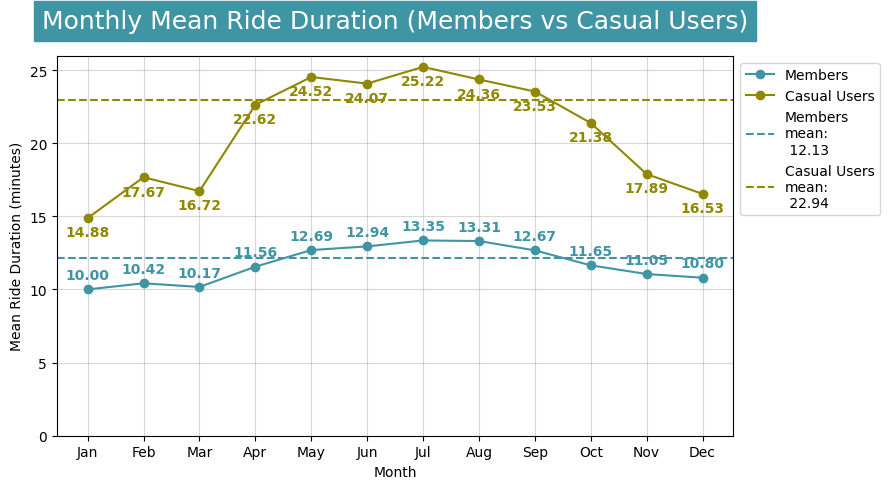

In [58]:
# Set inputs for the plot
## Filter out rows where ride_duration is not NA
df_filtered = df.dropna(subset=['ride_duration'])
## Group the DataFrame by 'month' and 'member_casual', and calculate the average ride duration
grouped_month_duration = df.dropna(subset=['ride_duration']).groupby(['member_casual', 'month'])['ride_duration'].mean()

## Overall Mean for members and casuals:
mean_members=df_filtered['ride_duration'][df_filtered['member_casual']=='member'].mean()
mean_casuals=df_filtered['ride_duration'][df_filtered['member_casual']=='casual'].mean()

## Durations for members
member_durations = grouped_month_duration.loc['member']
## Durations for casual users
casual_durations = grouped_month_duration.loc['casual']

# Preset for plot:
color = ['#4095A5', '#8F8800']
plt.figure(figsize=(9, 5))  # Set the figure size

# Plot:
plt.plot(member_durations.index, member_durations.values, 
         color=color[0], marker='o', label='Members')
plt.plot(casual_durations.index, casual_durations.values,
         color=color[1], marker='o', label='Casual Users')

# Plot overall means lines
plt.axhline(y=mean_members, color=color[0], linestyle='--', label=f'Members\nmean:\n {mean_members:.2f}')
plt.axhline(y=mean_casuals, color=color[1], linestyle='--', label=f'Casual Users\nmean:\n {mean_casuals:.2f}')

# Annotate each point with its average duration value
for x, y in zip(member_durations.index, member_durations.values):
    plt.text(x, y+0.5, f'{y:.2f}', ha='center', va='bottom', fontsize=10,weight='bold', color=color[0], rotation=0)

for x, y in zip(casual_durations.index, casual_durations.values):
    plt.text(x, y-0.5, f'{y:.2f}', ha='center', va='top', fontsize=10,weight='bold', color=color[1], rotation=0)

# Display plot
plt.title("Monthly Mean Ride Duration (Members vs Casual Users)",
          color='white', backgroundcolor='#4095A5', fontsize=18, ha='center',pad=20)
plt.xlabel('Month')
plt.ylabel('Mean Ride Duration (minutes)')
plt.ylim(bottom=0)
plt.grid(True, alpha=0.5)
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Save image if set to True
if image_save:
    plt.savefig('3.2.2.B. Monthly Mean Ride Duration (Members vs Casual Users).png', dpi=300,bbox_inches='tight')
    
plt.show()


<b>Main Takeaways</b>
<ul>
  <li><b>Seasonal Variations:</b> Ride durations exhibit fluctuations throughout the year, likely <u>influenced by seasonal factors such as weather and holidays</u>. They reach an all-time low during winter and experience a significant and steady increase at the start of spring, peaking during July and August.</li>
</ul>
<ul>
  <li><b>Members:</b>
    <ul>
      <li><b>Consistent Durations:</b> Despite fluctuations, <u>ride durations for members generally remain within a relatively narrow range, indicating consistent usage patterns over time</u>. This consistency reinforces the hypothesis that members use bikes for commuting purposes, as travel times remain relatively stable throughout the year.</li>
    </ul>
  </li>
  
  <li><b>Casual Users:</b>
    <ul>
      <li><b>Higher Variability:</b> <u>Ride durations for casual users demonstrate greater variability compared to members</u>, with larger fluctuations observed throughout the year.</li>
    </ul>
  </li>
</ul>


##### Monthly Trimmed Mean Ride Duration (Members vs Casual Users)

Comparing the trimmed ride duration trends between members and casual riders over different months.


C:\Users\Jim\AppData\Local\Temp\ipykernel_2076\886451312.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_month_duration = df.dropna(subset=['ride_duration']).groupby(['member_casual', 'month'])['ride_duration'].apply(lambda x: trim_mean(x, proportion_to_cut))


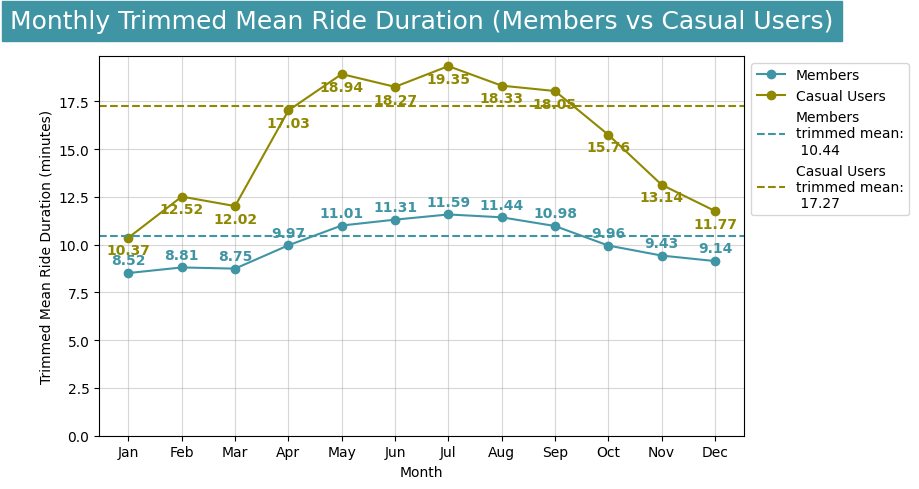

In [60]:
# Set the df for plot:
# Group the DataFrame by 'month' and 'member_casual', and calculate the trimmed mean ride duration
grouped_month_duration = df.dropna(subset=['ride_duration']).groupby(['member_casual', 'month'])['ride_duration'].apply(lambda x: trim_mean(x, proportion_to_cut))

# Define the proportion to cut for trimmed mean
proportion_to_cut = 0.05

# Calculate overall trimmed means
trimmed_mean_members = trim_mean(df_filtered[df_filtered['member_casual'] == 'member']['ride_duration'], proportion_to_cut)
trimmed_mean_casuals = trim_mean(df_filtered[df_filtered['member_casual'] == 'casual']['ride_duration'], proportion_to_cut)

## Durations for members
member_durations = grouped_month_duration.loc['member']
## Durations for casuals
casual_durations = grouped_month_duration.loc['casual']

# Presets for plot:
color = ['#4095A5', '#8F8800']
plt.figure(figsize=(9, 5))  # Set the figure size

# Plot:
plt.plot(member_durations.index, member_durations.values, 
         color=color[0], marker='o', label='Members')
plt.plot(casual_durations.index, casual_durations.values,
         color=color[1], marker='o', label='Casual Users')

# Plot overall trimmed_means for lines
plt.axhline(y=trimmed_mean_members, color=color[0], linestyle='--', label=f'Members\ntrimmed mean:\n {trimmed_mean_members:.2f}')
plt.axhline(y=trimmed_mean_casuals, color=color[1], linestyle='--', label=f'Casual Users\ntrimmed mean:\n {trimmed_mean_casuals:.2f}')

# Annotate values on the graph
for x, y in zip(member_durations.index, member_durations.values):
    plt.text(x, y+0.3, f'{y:.2f}', ha='center', va='bottom', fontsize=10,weight='bold', color=color[0], rotation=0)

for x, y in zip(casual_durations.index, casual_durations.values):
    plt.text(x, y-0.3, f'{y:.2f}', ha='center', va='top', fontsize=10,weight='bold', color=color[1], rotation=0)

# Display: plot
plt.title("Monthly Trimmed Mean Ride Duration (Members vs Casual Users)",
          color='white', backgroundcolor='#4095A5', fontsize=18, ha='center',pad=20)
plt.xlabel('Month')
plt.ylabel('Trimmed Mean Ride Duration (minutes)')
plt.ylim(bottom=0)
plt.grid(True, alpha=0.5)
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Save image if set to True
if image_save:
    plt.savefig('3.2.2.B. Monthly Trimmed Mean Ride Duration (Members vs Casual Users).png', dpi=300,bbox_inches='tight')

plt.show()


### 3.2.3 About Rideable Type <a id="about-rideable-type"></a>
---

#### A. Pie Chart: Rideable Type Distribution (Electric vs Classic Bikes)

Visualize the proportion of electric and classic bikes among rideable types.


C:\Users\Jim\AppData\Local\Temp\ipykernel_2076\4036892586.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_rideable_type_size = filtered_df.groupby('rideable_type', dropna=False).size()


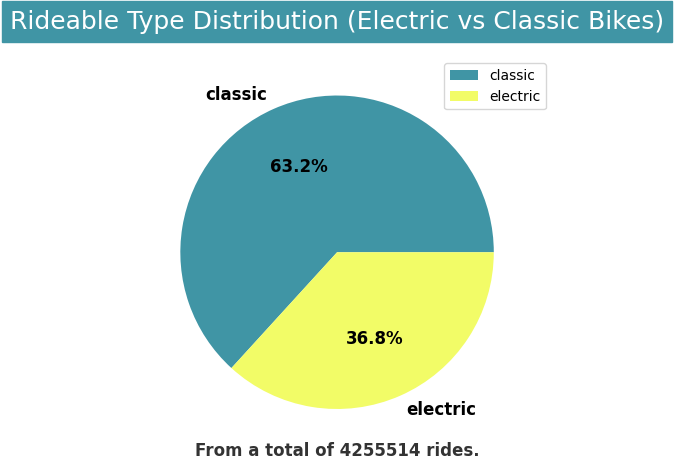

In [66]:
# Set the df for plot:
filtered_df=df[df['rideable_type']!='docked_bike'].reset_index(drop=True)
filtered_df['rideable_type'] = filtered_df['rideable_type'].cat.remove_unused_categories()
# Group the DataFrame by 'rideable_type', and calculate the size
grouped_rideable_type_size = filtered_df.groupby('rideable_type', dropna=False).size()

## Calculate percentages for plot:
df_pie_rideable_type =grouped_rideable_type_size
df_pie_rideable_type = round(grouped_rideable_type_size / grouped_rideable_type_size.sum() * 100, 2)
## Change 'electric_bike' to 'electric' and 'classic_bike' to 'classic' for better display:
df_pie_rideable_type.index = ['electric' if x == 'electric_bike' else 'classic' if x == 'classic_bike' else x for x in df_pie_rideable_type.index]

# Presets for plot:
color = ['#4095A5', '#F2FC67']

# Plot
plt.pie(df_pie_rideable_type,
        colors=color,
        labels=df_pie_rideable_type.index,
        autopct='%1.1f%%',
        textprops={'weight': 'bold', 'size': 'large'})  # adjust textprops

# Display: plot
plt.title("Rideable Type Distribution (Electric vs Classic Bikes)",
          color='white',backgroundcolor='#4095A5',fontsize=18, ha='center',pad=20)
plt.legend(df_pie_rideable_type.index,
           loc='best',bbox_to_anchor=(1.05, 1))
plt.text(0, -1.3, f"From a total of {grouped_rideable_type_size.sum()} rides.",
         alpha=0.8,fontsize=12,ha='center',weight='bold', wrap=True,)
plt.tight_layout()

# Save image if set to True
if image_save==True:
    plt.savefig('3.2.3.A. Pie Chart - Rideable Type Distribution (Electric vs Classic Bikes).png', dpi=300,bbox_inches='tight')
plt.show()

<b>Main Takeaways</b>

<ul>
  <li><b>Dominant Usage:</b> <u>Classic bikes are significantly more popular</u> than electric bikes, with over 63% of riders opting for classic bikes. This demonstrates a strong preference for classic bikes among the user base.</li>
  <li><b>Opportunity for Expansion:</b> <u>The lower percentage of electric bike usage suggests room for growth</u>. Increased promotion and awareness of electric bike benefits could help boost their adoption rate.</li>
</ul>

<b>Main Takeaways</b>
<ul>
  <li><b>Balanced/Diverse Usage:</b> <u>The overall usage of bikes is relatively balanced</u>, with electric bikes being slightly more popular compared to classic bikes. This indicates a close preference between the two types of bikes among all riders. The nearly even split in bike usage highlights the importance of maintaining a diverse fleet.</li>
  <li><b>Potential for Growth:</b> <u>The slight edge of electric bike usage could signal a growing trend towards electric bike adoption</u>. This trend might continue as more riders become aware of and accustomed to the benefits of electric bikes.</li>
</ul>


#### B. Bar Charts: Rideable Types Distribution (Members vs Casual Users)

Visualize the usage patterns of classic bikes versus electric bikes among different user groups (members and casual users). Understanding these patterns helps in optimizing bike availability and improving user satisfaction.</p>

C:\Users\Jim\AppData\Local\Temp\ipykernel_2076\1804487678.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_rideable_type_size = filtered_df.groupby(['member_casual', 'rideable_type']).size()


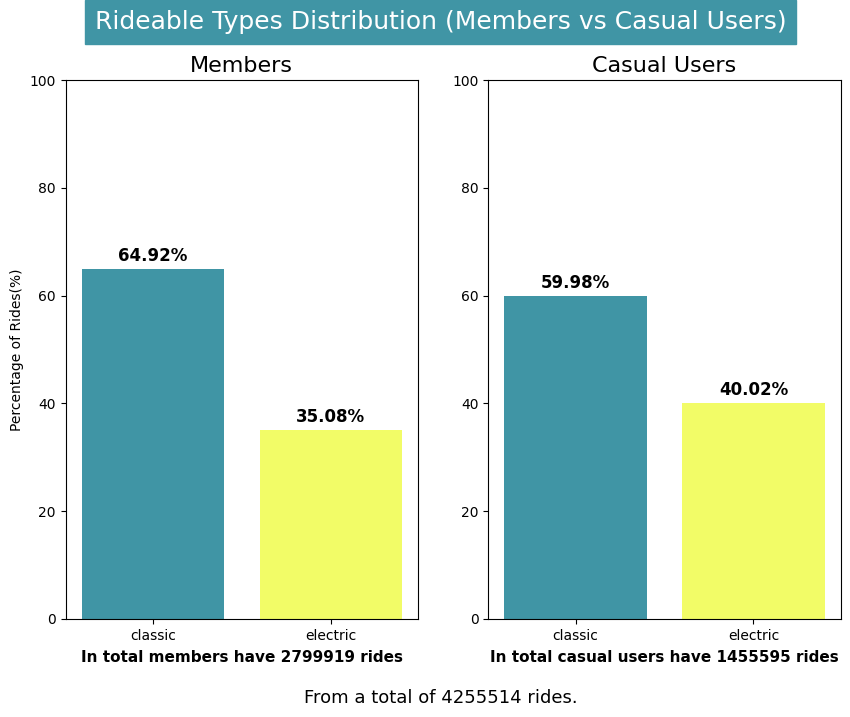

In [84]:
# Set the df for plot:
filtered_df = df[df['rideable_type'] != 'docked_bike'].reset_index(drop=True)
filtered_df['rideable_type'] = filtered_df['rideable_type'].cat.remove_unused_categories()

## Group by 'member_casual' and 'rideable_type' and calculate sizes
grouped_rideable_type_size = filtered_df.groupby(['member_casual', 'rideable_type']).size()


## Calculate percentages for plots:
## Plot 1: Rideable_type percentages for members
df_rideable_type_m_c_member = grouped_rideable_type_size['member']
df_rideable_type_m_c_member = round(df_rideable_type_m_c_member / df_rideable_type_m_c_member.sum() * 100, 2)

## Plot 2: Rideable_type percentages for casual users
df_rideable_type_m_c_casual = grouped_rideable_type_size['casual']
df_rideable_type_m_c_casual = round(df_rideable_type_m_c_casual / df_rideable_type_m_c_casual.sum() * 100, 2)

## Change 'electric_bike' to 'electric' and 'classic_bike' to 'classic' for better display:
df_rideable_type_m_c_member.index = ['electric' if x == 'electric_bike' else 'classic' if x == 'classic_bike' else x for x in df_pie_rideable_type.index]
df_rideable_type_m_c_casual.index = ['electric' if x == 'electric_bike' else 'classic' if x == 'classic_bike' else x for x in df_pie_rideable_type.index]

# Preset for plot:
colors = ['#4095A5', '#F2FC67']

# Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 7), sharex=True)

# Plot for members
bars1 = ax1.bar(df_rideable_type_m_c_member.index, df_rideable_type_m_c_member, color=colors)
ax1.set_title("Members", fontsize=16)
ax1.set_ylabel('Percentage of Rides(%)')
ax1.set_ylim(0, 100)

## Add percentages on top of the bars: members
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=12, weight='bold')

# Plot for casual users
bars2 = ax2.bar(df_rideable_type_m_c_casual.index, df_rideable_type_m_c_casual, color=colors)
ax2.set_title("Casual Users", fontsize=16)
ax2.set_ylim(0, 100)

## Add percentages on top of the bars: casual users
for bar in bars2:
    height = bar.get_height()
    ax2.annotate(f'{height}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=12, weight='bold')

# Add a main title
fig.suptitle("Rideable Types Distribution (Members vs Casual Users)",
             color='white', backgroundcolor='#4095A5', fontsize=18, ha='center')

# Add text below the plots
ax1.text(0.5, -8, f"In total members have {grouped_rideable_type_size['member'].sum()} rides",
         ha='center', fontsize=11, alpha=1, weight='bold', wrap=True)
ax2.text(0.5, -8, f"In total casual users have {grouped_rideable_type_size['casual'].sum()} rides",
         ha='center', fontsize=11, alpha=1, weight='bold', wrap=True)
fig.text(0.5, -0.01, f"From a total of {grouped_rideable_type_size['member'].sum()+grouped_rideable_type_size['casual'].sum()} rides.",
         ha='center', fontsize=13, alpha=1, wrap=True)

# Save image if set to True
if image_save:
    plt.savefig('3.2.3.B. Bar Charts Rideable Types Distribution (Members vs Casual Users).png', dpi=300, bbox_inches='tight')

# Display plot
plt.show()

<b>Main Takeaways</b>

<ul>
  <li><b>Members:</b>
    <ul>
      <li><b>Members prefer classic bikes:</b> <u>Among members, classic bikes are more popular.</u> This indicates a stronger preference for classic bikes among members.</li>
    </ul>
  </li>
  <li><b>Casual Users:</b>
    <ul>
      <li><b>Preference classic bikes:</b> <u>Casual users prefer classic bikes also, but exhibit a more pronounced preference for electric bikes compared to members.</u> This suggests that casual users may find electric bikes more appealing or convenient for their riding needs.</li>
    </ul>
  </li>
</ul>

<b>Main Takeaways</b>
<ul>
  <li><b>Members:</b>
    <ul>
      <li><b>Even Distribution:</b> <u>Among members, the percentage distribution of bike types is almost evenly split.</u> This indicates a balanced preference between the two bike types among members.</li>
    </ul>
  </li>
  
  <li><b>Casual Users:</b>
    <ul>
      <li><b>Preference:</b> <u>Casual users exhibit a more pronounced preference for electric bikes</u>. This suggests that casual users may find electric bikes more appealing or convenient for their riding needs.</li>
    </ul>
  </li>
</ul>


## 4. Conclusion
---

<u><h1>Comparison between Members and Casual Users</h1></u>

<h3>Ride Distribution:</h3>

<ul>
  <li>Members account for 64% of total rides, while casual users represent 36%.</li>
  <li><b>Weekly Ride Distribution:</b> A distinction emerges between members and casuals—<u>members tend to utilize the service more on weekdays, whereas casual users show higher activity levels on weekends.</u></li>
  <li><b>Monthly Ride Distribution:</b> <u>Both members and casual users exhibit similar monthly ride patterns</u>, with activity dipping during winter and peaking in summer. <u>However, casual users display greater variability.</u></li>
</ul>

<h3>Ride Duration:</h3>

<ul>
  <li><b>Weekly Mean Ride Duration:</b></li> <u>Both groups peak during weekends,</u> with a more notable increase for members and a significant one for casual users, likely attributable to increased leisure time.
  <ul>
  <li><b>Members:</b> <u>Show consistent ride durations from Monday to Friday,</u> indicating regular commuting habits or weekday usage patterns (possibly related to work commutes).</li>
  <li><b>Casual users:</b> <u>Exhibit greater variability in ride durations across different days of the week compared to members</u>, with a more pronounced peak on weekends.</li>
  </ul>
</ul>

<h3>Bike Types:</h3>

<ul>
  <li>Electric bikes constitute 37% of total rides, while classic bikes make up the remaining 63%.</li>
  <li><b>Members Rideable Type Distribution:</b> <u>Members show a clear preference for classic bikes among members</u>, maybe due to the shortest durations of the rides for their weekday needs.
  <li><b>Casual Users Rideable Type Distribution:</b> <u>Casual users also prefer classic bikes, but exhibit a more pronounced preference for electric bikes compared to members,</u> indicating a higher preference or convenience for electric bikes among this group.</li>
</ul>

## 5. Suggestions
---

<u><h2>To Turn Casual Users into Members:</h2></u>
<ol>
  <li><b>A New Tailored Membership Package:</b> Introduce a membership package tailored to the preferences of casual users, such <u>as weekend or Friday to Saturday memberships</U>. This complementary option won't disrupt current memberships, which primarily serve weekday commuting needs.</li>
  <li><b>Optimize Fleet and Pricing:</b> <u>Tailor the bike fleet and pricing structure to cater to the higher preference for electric bikes among casual users</u>. Prioritize electric bikes in the fleet and adjust pricing accordingly to better align with their preferences.</li>
</ol>

<u><h2>Marketing Campaigns:</h2></u>
<ol>
  <li><b>Post-April Advertising:</b> <u>Launch targeted advertising and social media campaigns after April, capitalizing on the significant increase in bike usage</u> observed during this period, which peaks in summer. This strategic timing aims to maximize engagement and conversion rates.</li>
  <li><b>Pre-September Promotional Offers:</b> Implement <u>promotional offers and incentives before September to boost customer retention</u> during the anticipated autumn-winter drop-off in bike usage. By providing attractive discounts or perks, the service can encourage continued usage and loyalty among members and casual users alike.</li>
</ol>


# -- HELL ---

In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
filtered_df=df[df['rideable_type']!='docked_bike'].reset_index(drop=True)

# ANOVA for rideable_type
model_rideable = ols('ride_duration ~ C(rideable_type)', data=filtered_df).fit()
anova_table_rideable = sm.stats.anova_lm(model_rideable, typ=2)
print("ANOVA for Rideable Type:")
print(anova_table_rideable)

# ANOVA for member_casual
model_member = ols('ride_duration ~ C(member_casual)', data=filtered_df).fit()
anova_table_member = sm.stats.anova_lm(model_member, typ=2)
print("\nANOVA for Member Casual:")
print(anova_table_member)

ANOVA for Rideable Type:
                        sum_sq         df             F  PR(>F)
C(rideable_type)  2.541808e+07        1.0  25431.711911     0.0
Residual          4.253231e+09  4255512.0           NaN     NaN

ANOVA for Member Casual:
                        sum_sq         df            F  PR(>F)
C(member_casual)  8.075643e+07        1.0  81864.87835     0.0
Residual          4.197893e+09  4255512.0          NaN     NaN


In [26]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey's HSD for rideable_type
tukey_rideable = pairwise_tukeyhsd(df['ride_duration'], df['rideable_type'])
print("\nTukey's HSD for Rideable Type:")
print(tukey_rideable)



Tukey's HSD for Rideable Type:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1        group2    meandiff p-adj  lower    upper   reject
------------------------------------------------------------------
classic_bike   docked_bike  36.8401   0.0  36.5331  37.1471   True
classic_bike electric_bike  -5.0685   0.0  -5.1525  -4.9846   True
 docked_bike electric_bike -41.9086   0.0 -42.2187 -41.5986   True
------------------------------------------------------------------


In [27]:
# Tukey's HSD for member_casual
tukey_member = pairwise_tukeyhsd(df['ride_duration'], df['member_casual'])
print("\nTukey's HSD for Member Casual:")
print(tukey_member)



Tukey's HSD for Member Casual:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
casual member  -10.806   0.0 -10.8763 -10.7356   True
-----------------------------------------------------


In [1]:
df.columns()

NameError: name 'df' is not defined

In [11]:
import pandas as pd
import statsmodels as sm
from statsmodels.formula.api import ols

# Perform ANCOVA
model = ols('ride_duration ~ rideable_type + C(member_casual) + rideable_type:C(member_casual)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


ModuleNotFoundError: No module named 'statsmodels'

In [12]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 262.6 kB/s eta 0:00:38
   ---------------------------------------- 0.0/9.8 MB 279.3 kB/s eta 0:00:36
   ---------------------------------------- 0.1/9.8 MB 328.2 kB/s eta 0:00:30
   ---------------------------------------- 0.1/9.8 MB 420.8 kB/s eta 0:00:24
   - -------------------------------------- 0.3/9.8 MB 923.9 kB/s eta 0:00:11
   -- ------------------------------------- 0.6/9.8 MB 1.8 MB/s eta 0:00:06
   ---- ----------------------------------- 1.1/9.8 MB 3.1 MB/s eta 0:00:03
   -------- ------------------------------- 2.2/9.8 MB 5.3 MB/s eta 0:00:02
   ------------- -------------------------- 3.3/9.8 MB 7.3 MB/s eta 0:00:01
   ------------------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform ANCOVA
model = ols('ride_duration ~ rideable_type + C(member_casual) + rideable_type:C(member_casual)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                                      sum_sq         df             F  PR(>F)
rideable_type                   6.017604e+07        2.0  24129.311996     0.0
C(member_casual)                         NaN        1.0           NaN     NaN
rideable_type:C(member_casual)  3.351685e+07        2.0  13439.545185     0.0
Residual                        5.401325e+09  4331633.0           NaN     NaN


C:\Users\Jim\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\Jim\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
C:\Users\Jim\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J
C:\Users\Jim\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '


C:\Users\Jim\AppData\Local\Temp\ipykernel_33664\2270788215.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_member_casual_size = df.groupby('member_casual', dropna=False).size()


NameError: name 'image_save' is not defined

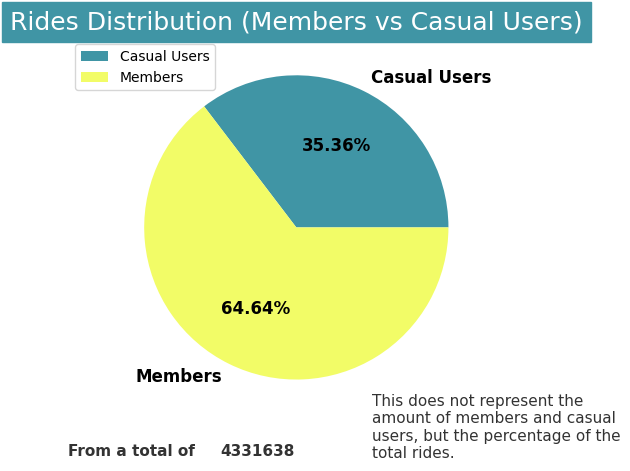

In [8]:
# Set inputs for the plot
## Retrieve the frequencies:
grouped_member_casual_size = df.groupby('member_casual', dropna=False).size()

## Calculate percentages from the frequencies:
df_pie_members_casuals = round(grouped_member_casual_size / grouped_member_casual_size.sum()* 100, 2) 

## Change index for a better graph display
df_pie_members_casuals.index = ['Members' if x == 'member' else 'Casual Users' for x in df_pie_members_casuals.index]

# Presets for plot:
color = ['#4095A5', '#F2FC67']

# Plot
plt.pie(df_pie_members_casuals,
        colors=color,
        labels=df_pie_members_casuals.index,
        autopct='%1.2f%%',
        textprops={'weight': 'bold', 'size': 'large'})  # adjust textprops

# Display: plot
plt.title("Rides Distribution (Members vs Casual Users)",
          color='white',backgroundcolor='#4095A5',fontsize=18, ha='center')
plt.legend(df_pie_members_casuals.index,
           loc='upper left',bbox_to_anchor=(-0.1, 1))

# Set the text below:
text_segments = [
    ('From a total of ', 'bold',1),
    (str(df['member_casual'].shape[0]), 'bold',1),
    ('This does not represent the amount of members and casual users, but the percentage of the total rides.', 'normal',2)
]

# Initialize coordinates for text positioning
x, y = -1.5, -1.5

# Loop through text segments and plot them with appropriate formatting
prev_line=1
for segment, weight,text_line in text_segments:
    plt.text(x, y, segment, weight=weight, alpha=0.8, fontsize=11, ha='left', wrap=True)
    if text_line==prev_line:
        x += plt.gca().get_xlim()[1] * 0.8  # Adjust x position for the next segment
    else:
        x=-1.5
        y -= 0.15  # Adjust y position for the next segment to appear below
    prev_line=text_line

plt.tight_layout()

# Save image if set to True
if image_save==True:
    plt.savefig('3.2.1.A. Pie Chart: Rides Distribution (Members vs Casual Users).png', dpi=300)

plt.show()


## 
